In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")

In [3]:
df.head(10)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
5,2022-10-28 13:14:27,198.102.5.160,147.190.155.133,17430,52805,UDP,1423,Data,HTTP,Repellat quas illum harum fugit incidunt exerc...,...,Logged,Medium,Zeeshan Viswanathan,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,Segment C,"Aurangabad, Meghalaya",NaN,NaN,NaN,Server
6,2022-05-16 17:55:43,97.253.103.59,77.16.101.53,26562,17416,TCP,379,Data,DNS,Qui numquam inventore repellat ratione fugit o...,...,Ignored,High,Ehsaan Dalal,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Segment A,"Eluru, Manipur",NaN,Log Data,NaN,Server
7,2023-02-12 07:13:17,11.48.99.245,178.157.14.116,34489,20396,ICMP,1022,Data,DNS,Amet libero optio quidem praesentium libero. E...,...,Logged,High,Yuvaan Dubey,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Segment A,"Phagwara, Andhra Pradesh",192.31.159.5,Log Data,Alert Data,Firewall
8,2023-06-27 11:02:56,49.32.208.167,72.202.237.9,56296,20857,TCP,1281,Control,FTP,Veritatis nihil amet atque molestias aperiam m...,...,Blocked,High,Zaina Iyer,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Segment B,"Ambala, Tripura",NaN,Log Data,Alert Data,Server
9,2021-08-15 22:29:04,114.109.149.113,160.88.194.172,37918,50039,UDP,224,Data,HTTP,Consequatur ipsum autem reprehenderit quae. Do...,...,Blocked,Medium,Mishti Chaudhuri,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,Segment A,"Rampur, Mizoram",87.128.245.244,NaN,NaN,Server


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
df.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [6]:
df.isna().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Attack Type                   0
Geo-location Data             0
Network Segment               0
Device Information            0
User Information              0
Severity Level                0
Action Taken                  0
Attack Signature              0
Timestamp                     0
Source IP Address             0
Anomaly Scores                0
Payload Data                  0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Source Port                   0
Destination IP Address        0
Log Source                    0
dtype: int64

In [7]:
df.isnull().sum().sort_values(ascending=False) / 40000 * 100

Alerts/Warnings           50.1675
IDS/IPS Alerts            50.1250
Malware Indicators        50.0000
Firewall Logs             49.9025
Proxy Information         49.6275
Attack Type                0.0000
Geo-location Data          0.0000
Network Segment            0.0000
Device Information         0.0000
User Information           0.0000
Severity Level             0.0000
Action Taken               0.0000
Attack Signature           0.0000
Timestamp                  0.0000
Source IP Address          0.0000
Anomaly Scores             0.0000
Payload Data               0.0000
Traffic Type               0.0000
Packet Type                0.0000
Packet Length              0.0000
Protocol                   0.0000
Destination Port           0.0000
Source Port                0.0000
Destination IP Address     0.0000
Log Source                 0.0000
dtype: float64

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) # Converts text → date/time
df['hour'] = df['Timestamp'].dt.hour # Extracts the hour of the day from the timestamp col.
df['day'] = df['Timestamp'].dt.day # Gets day of month

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64


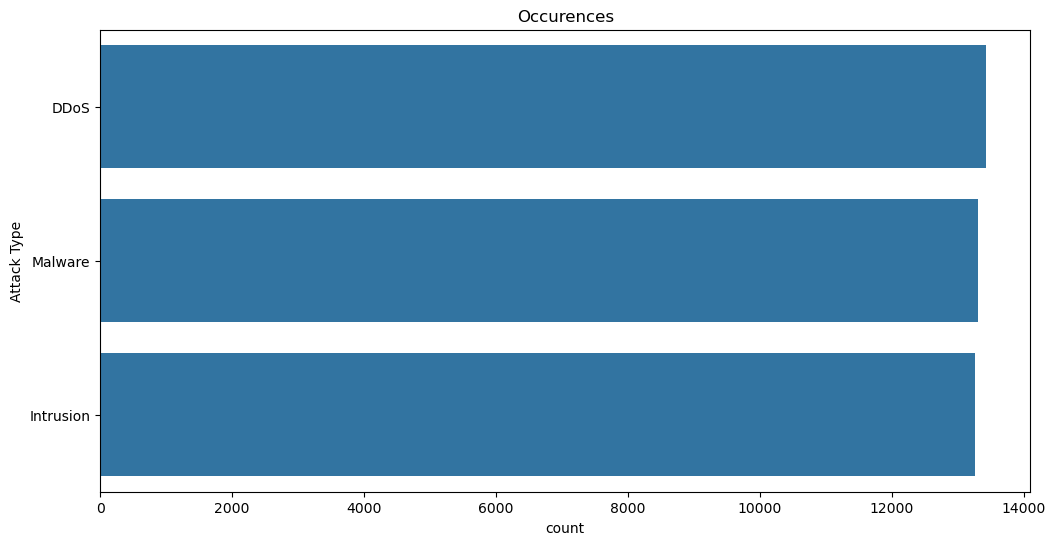

In [9]:
print(df['Attack Type'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Attack Type', order=df['Attack Type'].value_counts().index)
plt.title('Occurences')
plt.show()

In [10]:
df.groupby('hour')['Attack Type'].value_counts()

hour  Attack Type
0     DDoS           604
      Malware        557
      Intrusion      544
1     DDoS           567
      Malware        532
                    ... 
22    Intrusion      530
      Malware        525
23    Malware        573
      DDoS           551
      Intrusion      533
Name: count, Length: 72, dtype: int64

In [11]:
day_attacks = df[(df['hour'] >= 8) & (df['hour'] < 20)] # rows between 08:00am  and 19:59pm
night_attacks = df[(df['hour'] < 8) | (df['hour'] >= 20)]# attacks between midnight and 7:59 AM or attacks between 8 PM and 11:59 PM selects either of them

day_attacks.groupby(['Attack Type'] ).size()

Attack Type
DDoS         6649
Intrusion    6668
Malware      6725
dtype: int64

In [12]:
print("day_attacks:", len(day_attacks))
print("night_attacks:", len(night_attacks))

day_attacks: 20042
night_attacks: 19958


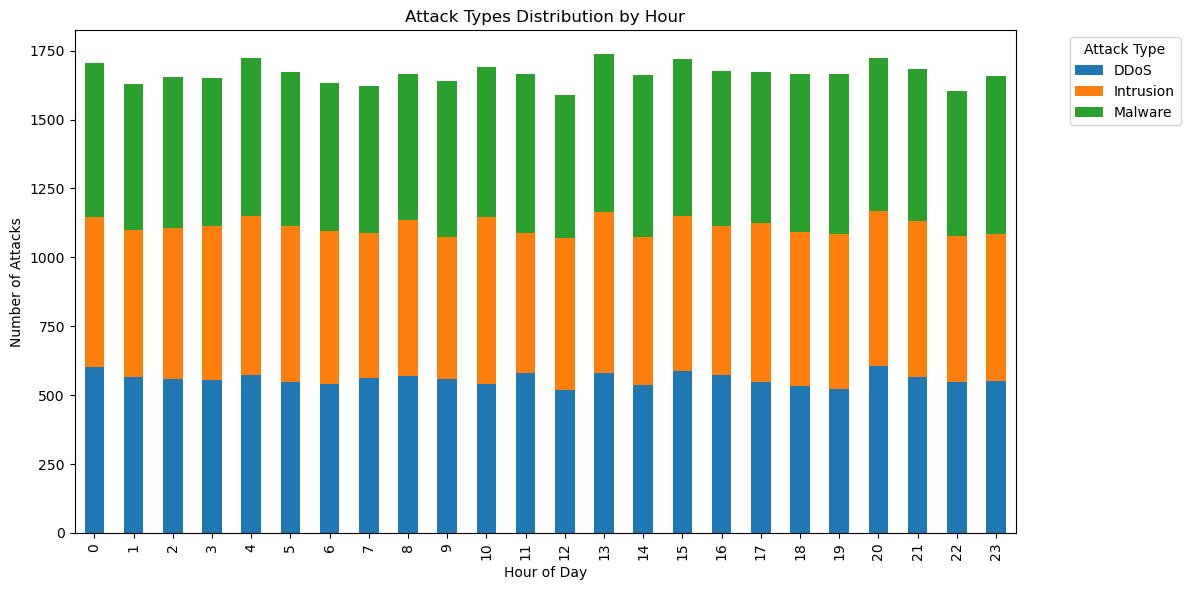

In [13]:
# Group and reshape data
hour_attack = (
    df.groupby('hour')['Attack Type']
    .value_counts()
    .unstack(fill_value=0)
)

# Plot stacked bar chart
hour_attack.plot(
    kind='bar',
    figsize=(12, 6),
    stacked=True
)

plt.xlabel('Hour of Day')
plt.ylabel('Number of Attacks')
plt.title('Attack Types Distribution by Hour')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

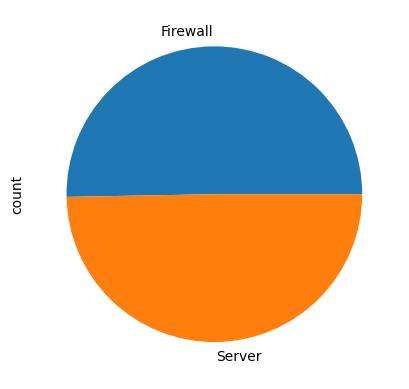

In [14]:
df['Log Source'].value_counts().plot(kind='pie' )

In [15]:
df['Traffic Type'].value_counts()

Traffic Type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

<Axes: xlabel='Action Taken'>

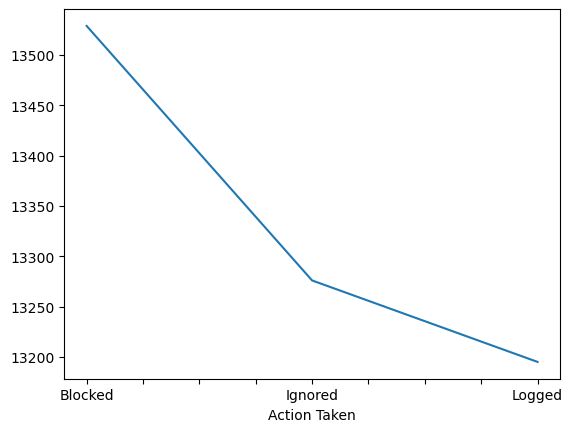

In [16]:
df['Action Taken'].value_counts().plot(kind='line')

<Axes: xlabel='Severity Level'>

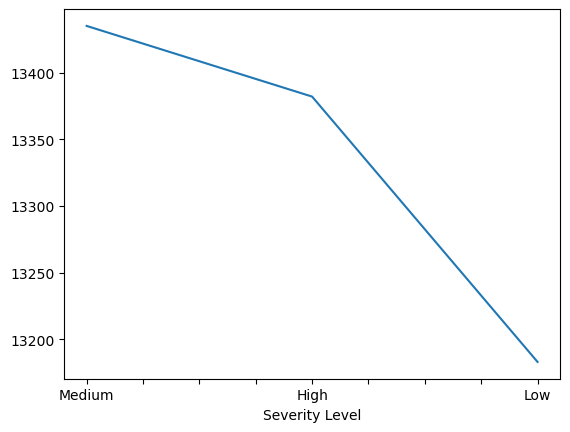

In [17]:
df['Severity Level'].value_counts().plot(kind='line')

<Axes: ylabel='Frequency'>

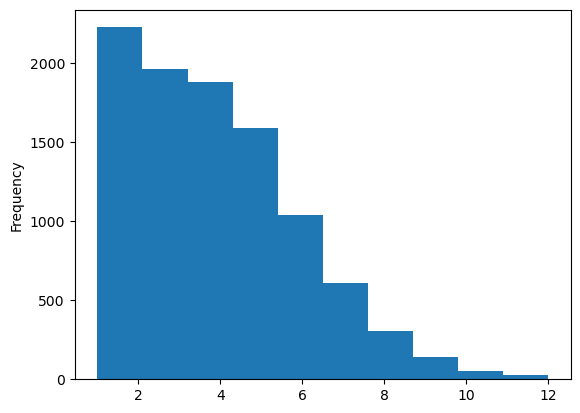

In [18]:
df['Anomaly Scores'].value_counts().plot(kind='hist')

In [19]:
df['Protocol'].value_counts()

Protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [20]:
df['Log Source'].value_counts() 

Log Source
Firewall    20116
Server      19884
Name: count, dtype: int64

In [21]:
df['Geo-location Data'].value_counts()

Geo-location Data
Ghaziabad, Meghalaya          16
Kalyan-Dombivli, Jharkhand    15
Ghaziabad, Uttarakhand        14
Ghaziabad, Tripura            14
Kottayam, Nagaland            13
                              ..
Jamnagar, Telangana            1
Chandrapur, Nagaland           1
Giridih, Tamil Nadu            1
Gwalior, Rajasthan             1
Nagpur, Punjab                 1
Name: count, Length: 8723, dtype: int64

Packet Length
1037    47
1278    45
104     45
855     44
1361    44
        ..
914     15
470     14
568     14
216     12
940      9
Name: count, Length: 1437, dtype: int64


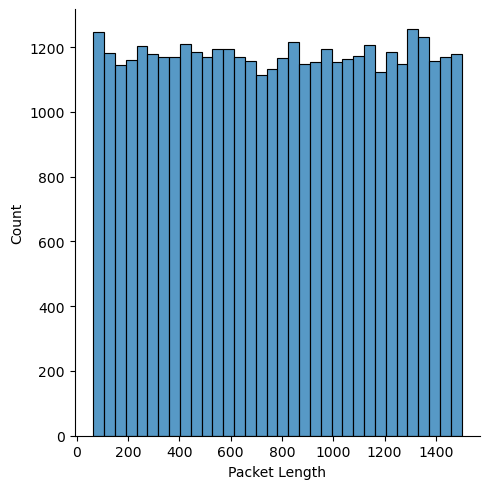

In [25]:
print(df['Packet Length'].value_counts())

sns.displot(df['Packet Length'])

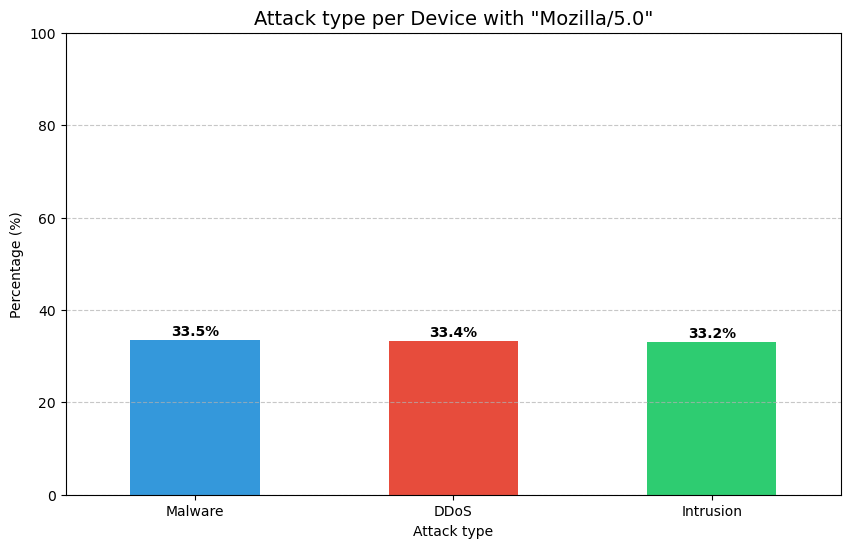

In [32]:
df['Device_Simple'] = df['Device Information'].str.split('(').str[0].str.strip()

df_mozilla = df[df['Device_Simple'] == 'Mozilla/5.0']

mozilla_attack_ratios = df_mozilla['Attack Type'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
mozilla_attack_ratios.plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71', '#f1c40f'])

plt.title('Attack type per Device with "Mozilla/5.0"', fontsize=14)
plt.ylabel('Percentage (%)')
plt.xlabel('Attack type')
plt.xticks(rotation=0)

for i, v in enumerate(mozilla_attack_ratios):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
import ipywidgets as widgets
from ipywidgets import interact

df_opera = df[df['Device Information'].str.contains('Opera|OPR', case=False, na=False)].copy()

df_opera['Filtered'] = df_opera['Device Information'].str.extract(r'((?:Opera|OPR)/[\d\.]+)')

available_versions = sorted(df_opera['Filtered'].dropna().unique())

In [35]:
@interact(version=available_versions)
def afficher_stats_opera(version):
    data_version = df_opera[df_opera['Filtered'] == version]

    if data_version.empty:
        print("No Data for this version")
        return

    ratios = data_version['Attack Type'].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 5))
    colors = sns.color_palette('magma', len(ratios))

    ratios.plot(kind='bar', color=colors)

    plt.title(f'Attack type per Device wit {version}', fontsize=14)
    plt.ylabel('Percentage (%)')
    plt.xlabel('Attack type')
    plt.ylim(0, 100)
    plt.xticks(rotation=0)

    for i, v in enumerate(ratios):
        plt.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()

    print(f"Count of attacks for this version : {len(data_version)}")

interactive(children=(Dropdown(description='version', options=('Opera/8.10.', 'Opera/8.11.', 'Opera/8.12.', 'O…